In [74]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df=pd.read_csv('water.csv')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


In [77]:
df.head(10)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15
7,8,South,Bournemouth,1299,78
8,9,North,Bradford,1637,10
9,10,South,Brighton,1359,84


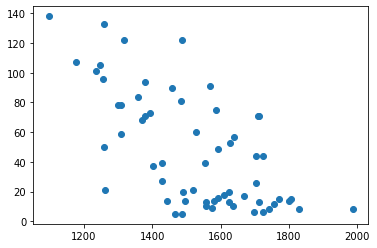

In [78]:
plt.scatter(df['mortality'], df['hardness'])

In [79]:
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [80]:
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [81]:
df[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


In [82]:
X = df[['mortality']].values
Y = df['hardness'].values

In [83]:
model = LinearRegression()
model.fit(X, Y)
model.score(X, Y)

0.4288267193124973

In [84]:
model.coef_

array([-0.13292453])

In [85]:
model.intercept_

249.77692756960676

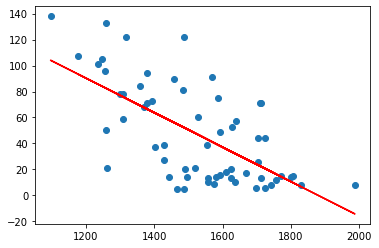

In [23]:
plt.scatter(df['mortality'], df['hardness'])
plt.plot(df['mortality'], model.predict(df[['mortality']]), c='r')

In [86]:
df_South = df[ (df['location'] == 'South')]

In [87]:
df_South.head(10)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73
12,13,South,Cardiff,1519,21
13,14,South,Coventry,1307,78
14,15,South,Croydon,1254,96
18,19,South,East Ham,1318,122
19,20,South,Exeter,1260,21


In [89]:
df_North = df[ (df['location'] == 'North')]

In [90]:
df_North.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


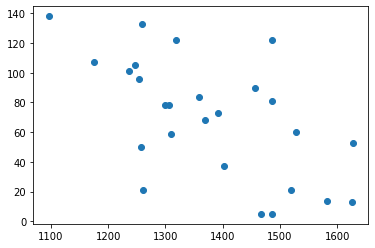

In [93]:
plt.scatter(df_South['mortality'], df_South['hardness'])

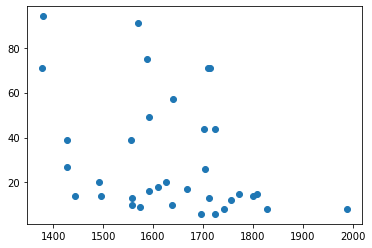

In [100]:
plt.scatter(df_North['mortality'], df_North['hardness'])

In [94]:
df_South[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [101]:
df_North[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [103]:
df_South[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [104]:
df_North[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [96]:
X = df_South[['mortality']].values
Y = df_South['hardness'].values

In [97]:
model_S = LinearRegression()
model_S.fit(X, Y)
model_S.score(X, Y)

0.3625885624364601

In [98]:
model_S.coef_

array([-0.17326199])

In [99]:
model_S.intercept_

308.31767129925424

In [105]:
X = df_North[['mortality']].values
Y = df_North['hardness'].values
model_N = LinearRegression()
model_N.fit(X, Y)
model_N.score(X, Y)

0.1358643664207173

In [106]:
model_N.coef_

array([-0.07034712])

In [108]:
model_N.intercept_

145.3190622223783

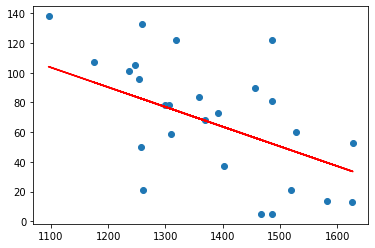

In [109]:
plt.scatter(df_South['mortality'], df_South['hardness'])
plt.plot(df_South['mortality'], model.predict(df_South[['mortality']]), c='r')

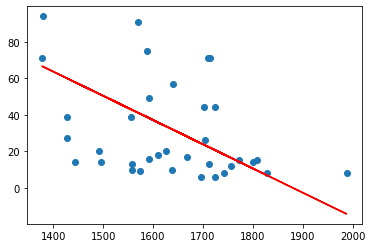

In [110]:
plt.scatter(df_North['mortality'], df_North['hardness'])
plt.plot(df_North['mortality'], model.predict(df_North[['mortality']]), c='r')

In [ ]:
# Когда мы смотрим данные в целом, видим среднюю коррекляцию (значимую). 
# При этом уже на 1 графике заметно скопление точек в нижней области, что хочеться изучить подробнее
# При разделении данных видно, что в северных городах уровень жесткости воды ниже,чем в южных, а смертность выше.
#Предполгаю, что причина смертности не в жесткости воды (при жесткости ниже 20 разброс от 1550 до 1850)

# разброс на графике остатков большой. Я бы сказала, что выраженной зависисмости между жесткостью воды и смертностью нет.
